# <center> Diffusion Processes on Complex Networks </center>
## <center> Roman Furman 255909 </center>

In [63]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [64]:
def solve_sir_model(beta, r, N, initial_conditions, t_max, dt):
    """
    Numerically solves the Susceptible-Infected-Recovered (SIR) model.

    Parameters:
        beta (float): Transmission rate.
        r (float): Recovery rate.
        N (int): Total population size.
        initial_conditions (tuple): Initial number of susceptible, infected, and recovered individuals (S0, I0, R0).
        t_max (float): Maximum time for simulation.
        dt (float): Time step size.

    Returns:
        tuple: Four arrays representing time (t), susceptible (S), infected (I), and recovered (R) individuals.

    """
    S0, I0, R0 = initial_conditions
    t = np.arange(0, t_max, dt)
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    R = np.zeros_like(t)
    
    S[0] = S0
    I[0] = I0
    R[0] = R0
    
    for i in range(1, len(t)):
        dS_dt = -beta * S[i-1] * I[i-1] / N
        dI_dt = beta * S[i-1] * I[i-1] / N - r * I[i-1]
        dR_dt = r * I[i-1]
        
        S[i] = S[i-1] + dt * dS_dt
        I[i] = I[i-1] + dt * dI_dt
        R[i] = R[i-1] + dt * dR_dt
    
    return t, S, I, R


In [65]:
def plot_sir_model(t, S, I, R):
    """
    Plots the time evolution of the Susceptible-Infected-Recovered (SIR) model.

    Parameters:
        t (array-like): Array of time values.
        S (array-like): Array of susceptible population values corresponding to each time point.
        I (array-like): Array of infected population values corresponding to each time point.
        R (array-like): Array of recovered population values corresponding to each time point.

    Returns:
        None
        
    """
    plt.plot(t, S, label='Susceptible')
    plt.plot(t, I, label='Infected')
    plt.plot(t, R, label='Recovered')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()

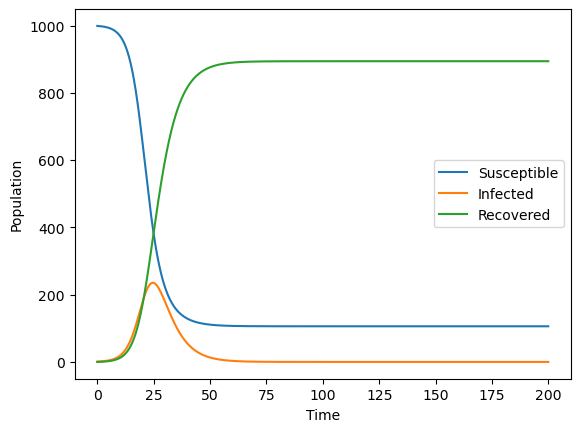

For beta=0.5 and r=0.2, R0=2.50 Epidemic occurred


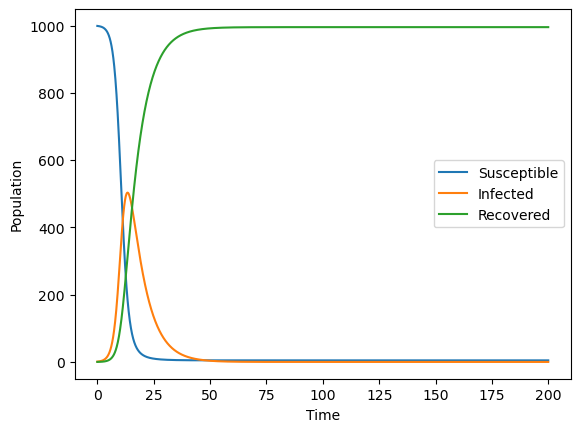

For beta=0.8 and r=0.15, R0=5.33 Epidemic occurred


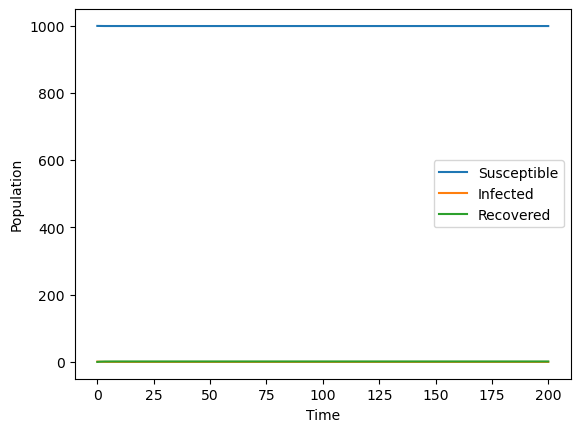

For beta=0.2 and r=0.8, R0=0.25 No epidemic occurred


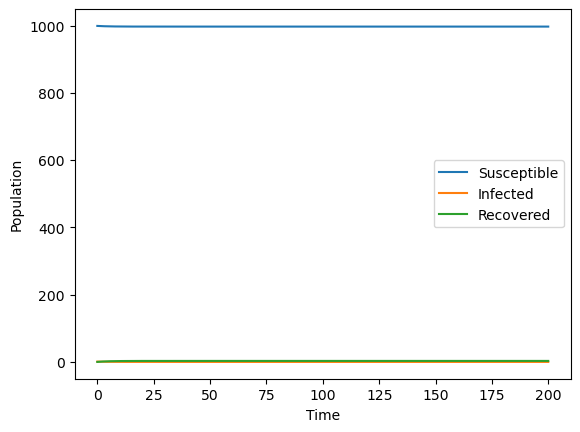

For beta=0.4 and r=0.6, R0=0.67 No epidemic occurred


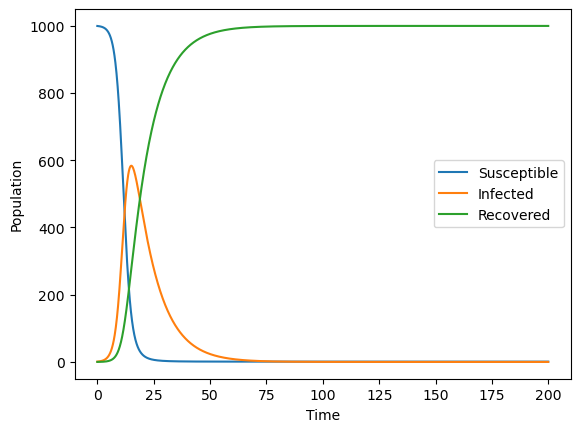

For beta=0.7 and r=0.1, R0=7.00 Epidemic occurred


In [80]:
# Parameters
N = 1000  # Population size
t_max = 200  # Maximum time
dt = 0.1  # Time step size

# Task 1: Check R0 formula and plot time evolution
parameter_combinations = [
    (0.5, 0.2),  # R0 > 1
    (0.8, 0.15),  # R0 > 1
    (0.2, 0.8), # R0 < 1
    (0.4, 0.6),  # R0 < 1
    (0.7, 0.1),  # R0 > 1
]

for beta, r in parameter_combinations:
    initial_conditions = (N - 1, 1, 0)  # (S0, I0, R0)
    t, S, I, R = solve_sir_model(beta, r, N, initial_conditions, t_max, dt)
    plot_sir_model(t, S, I, R)
    
    R0 = beta / r
    if R0 > 1:
        print(f"For beta={beta} and r={r}, R0={R0:.2f} Epidemic occurred")
    else:
        print(f"For beta={beta} and r={r}, R0={R0:.2f} No epidemic occurred")


The code calculates and plots the time evolution of the compartments (Susceptible, Infected, and Recovered) for different parameter combinations. It also determines whether an epidemic occurred based on the value of the basic reproductive ratio (R0).

Here's a breakdown of the results for each parameter combination:

1. For beta=0.5 and r=0.2, R0=2.50: Epidemic occurred
   - The simulation shows a rapid increase in the number of infected individuals (I) while the susceptible population (S) decreases. Eventually, the infected individuals start to recover and become part of the recovered population (R).

2. For beta=0.8 and r=0.15, R0=5.33: Epidemic occurred
   - Similar to the previous case, the simulation demonstrates a rapid spread of the disease with a significant number of infected individuals. The susceptible population declines, and the recovered population gradually increases.

3. For beta=0.2 and r=0.8, R0=0.25: No epidemic occurred
   - The simulation shows minimal impact on the population dynamics. The number of infected individuals remains low, and the susceptible population remains relatively stable throughout the simulation.

4. For beta=0.4 and r=0.6, R0=0.67: No epidemic occurred
   - Similar to the previous case, the simulation indicates a limited impact on the population. The infected population remains small, and there is no significant spread of the disease.

5. For beta=0.7 and r=0.1, R0=7.00: Epidemic occurred
   - The simulation displays a rapid increase in the number of infected individuals, leading to a substantial impact on the susceptible population. As time progresses, the infected individuals start to recover, contributing to the growth of the recovered population.

In summary, the results illustrate the different scenarios based on the parameter combinations. When R0 is greater than 1, indicating a high likelihood of transmission, an epidemic occurs, leading to a significant spread of the disease and noticeable impacts on the population dynamics. On the other hand, when R0 is less than or equal to 1, there is no epidemic, and the disease has limited impact, with only a small number of individuals being infected.

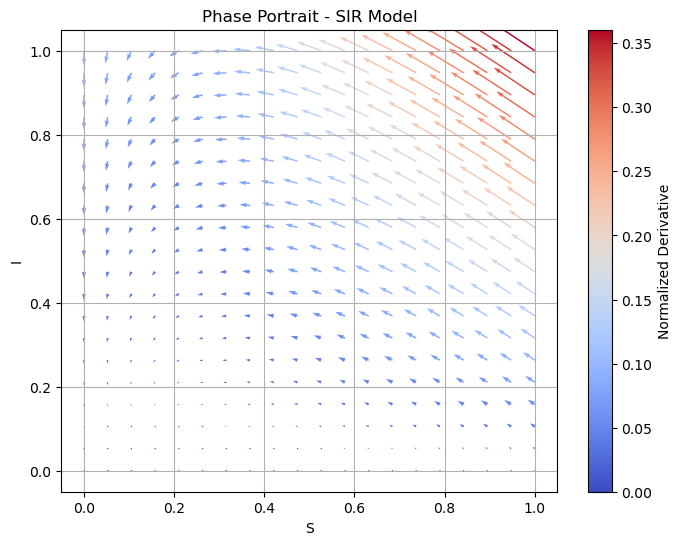

In [82]:
# Parameters
beta = 0.3 
r = 0.1  

# Define the derivatives of S and I
dS_dt = lambda S, I: -beta * S * I
dI_dt = lambda S, I: beta * S * I - r * I

# Define the grid of S and I values
S_vals, I_vals = np.meshgrid(np.linspace(0, 1, 20), np.linspace(0, 1, 20))

# Compute the derivatives at each point on the grid
dS_dt_grid = dS_dt(S_vals, I_vals)
dI_dt_grid = dI_dt(S_vals, I_vals)

# Plot the phase portrait
plt.figure(figsize=(8, 6))
plt.quiver(S_vals, I_vals, dS_dt_grid, dI_dt_grid, np.sqrt(dS_dt_grid**2 + dI_dt_grid**2), cmap='coolwarm')
plt.xlabel('S')
plt.ylabel('I')
plt.title('Phase Portrait - SIR Model')
plt.colorbar(label='Normalized Derivative')
plt.grid(True)
plt.show()


The phase portrait of the reduced SIR model visualizes the dynamics of the system by showing the direction and magnitude of the derivatives at different points in the S-I plane.

In the phase portrait, each point represents a specific combination of susceptible (S) and infected (I) individuals. The arrows indicate the direction of change in S and I at each point, while the color of the arrows represents the magnitude of the derivative.

The behavior of the system in the phase portrait depends on the parameter values. In this case, we have set `beta = 0.3` and `r = 0.1`.

Interpretation of the phase portrait:
- At the top left and bottom right corners of the phase portrait, both S and I are close to zero. This represents the disease-free state or the state where the entire population is either susceptible or recovered.
- As we move towards the bottom left corner, the number of infected individuals (I) increases while the number of susceptible individuals (S) decreases. This indicates the spread of the disease in the population.
- The arrows in the phase portrait show the direction in which the system evolves. The arrows point downward and to the right, indicating that as S decreases, I increases. This represents the progression of the epidemic.
- The color of the arrows represents the magnitude of the derivatives. Darker colors indicate higher magnitudes of change, reflecting faster dynamics.

The phase portrait provides a visual understanding of how the system evolves over time and allows us to analyze the stability and behavior of different initial conditions.

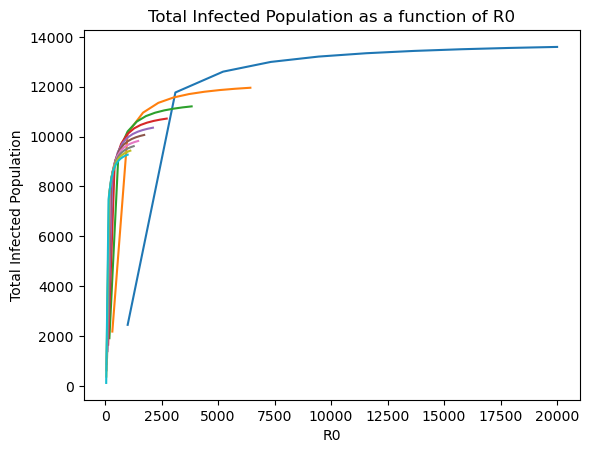

In [85]:
def sir(beta, r, N, days):
    """
    Simulates the Susceptible-Infected-Recovered (SIR) model.

    Parameters:
        beta (float): Transmission rate.
        r (float): Recovery rate.
        N (int): Total population size.
        days (int): Number of days to simulate.

    Returns:
        list: Infected population at each time step.

    """
    I = [1 / N]
    S = [1.0 - I[0]]
    R = [0]
    T = [0]

    for t in range(days):
        s = S[t] - I[t] * beta * S[t]
        i = I[t] + I[t] * beta * S[t] - I[t] * r
        r = R[t] + I[t] * r

        S.append(s)
        I.append(i)
        R.append(r)
        T.append(t + 1)

    return I

N = 1000  # Total population size
days = 100  # Number of days to simulate

rs = np.linspace(0.05, 1, 10)  # Range of r values
betas = np.linspace(0.05, 1, 10)  # Range of beta values

for r in rs:
    Is = []  # List to store total infected population
    R_0s = []  # List to store R0 values
    
    for beta in betas:
        I = sir(beta, r, N, days)
        R_0 = beta * N / r  # Calculate R0 value
        R_0s.append(R_0)
        Is.append(sum(I) * N)  # Calculate total infected population
        
    plt.plot(R_0s, Is)
    plt.xlabel('R0')
    plt.ylabel('Total Infected Population')
    plt.title('Total Infected Population as a function of R0')

plt.show()


The results of the simulation show that as the value of R0 increases, indicating a higher transmission rate relative to the recovery rate, the total number of infected individuals also increases. This relationship is expected, as a higher R0 implies a greater potential for the spread of the infection within the population.

By plotting the total number of infections against R0, the graph provides insights into the relationship between the basic reproductive ratio and the overall impact of the epidemic. It demonstrates that higher R0 values lead to a larger number of infected individuals over the course of the epidemic.

The plot can serve as a useful tool for understanding the potential outcomes of an epidemic based on the transmission and recovery rates. It allows researchers and policymakers to assess the impact of different parameter combinations and make informed decisions regarding control measures and interventions to mitigate the spread of infectious diseases.

# Task 2

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Simulate SIR dynamics on a graph
def sir_graph(G: nx.Graph, p: float, source: int) -> List[Tuple[int, int]]:
    """
    Simulates the SIR model on a graph.

    Parameters:
        G (nx.Graph): The contact network represented as a graph.
        p (float): The probability of contagion.
        source (int): The node to start the infection.

    Returns:
        List[Tuple[int, int]]: A list of tuples representing the number of infected nodes at each step.
                               Each tuple contains the step number and the corresponding number of infected nodes.

    """
    states = {node: 'S' for node in G.nodes()}
    states[source] = 'I'
    infects = []
    step = 0

    while True:
        infected = [node for node, state in states.items() if state == 'I']
        infects.append((step, len(infected)))

        for i in infected:
            neighbors = list(G.neighbors(i))
            for neighbor in neighbors:
                if states[neighbor] == 'S':
                    if np.random.random() < p:
                        states[neighbor] = 'I'
            states[i] = 'R'

        if 'I' not in states.values():
            break
        step += 1

    return infects

In [3]:
# Parameters
num_nodes = 100
source = 0
num_runs = 10
p_values = [0.3, 0.5, 0.7]

## (a)

In [4]:
# Create graphs
square_lattice = nx.grid_2d_graph(int(np.sqrt(num_nodes)), int(np.sqrt(num_nodes)))
random_graph = nx.gnp_random_graph(num_nodes, 0.2)  
watts_strogatz_graph = nx.watts_strogatz_graph(num_nodes, 4, 0.5)
barabasi_albert_graph = nx.barabasi_albert_graph(num_nodes, 4)

## (b)

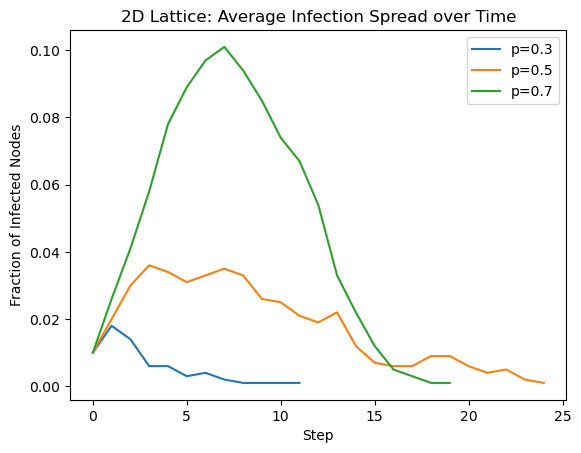

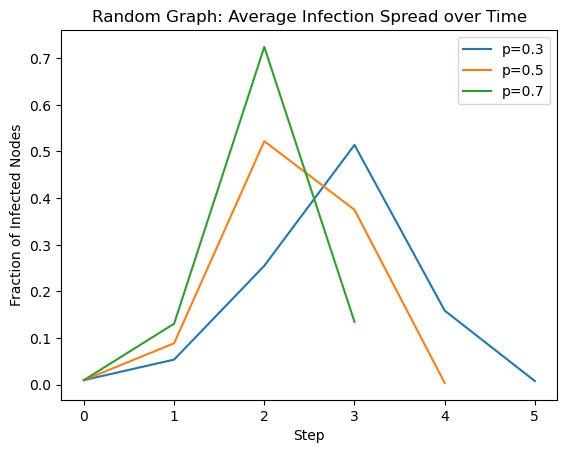

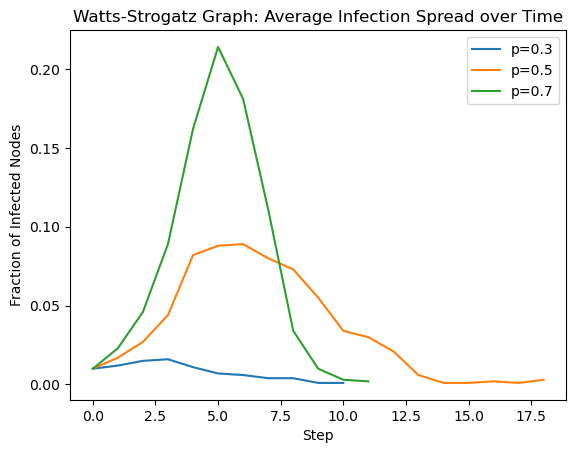

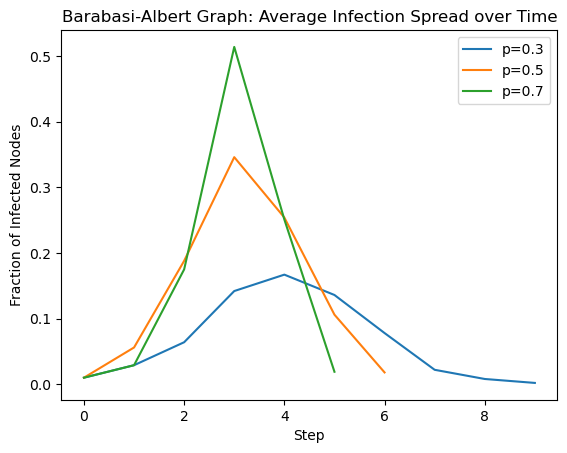

In [5]:
# Simulate and plot for each graph 
for G, graph_name in [(square_lattice, '2D Lattice'), (random_graph, 'Random Graph'),
                      (watts_strogatz_graph, 'Watts-Strogatz Graph'), (barabasi_albert_graph, 'Barabasi-Albert Graph')]:
    for p in p_values:
        avg_infected_frac = np.zeros((num_runs, num_nodes))
        for run in range(num_runs):
            source_node = random.choice(list(G.nodes()))  # Randomly select a source node from the graph
            infects = sir_graph(G, p, source_node)
            steps, infected_counts = zip(*infects)
            avg_infected_frac[run, steps] = infected_counts
        avg_infected_frac = np.mean(avg_infected_frac, axis=0) / num_nodes
        plt.plot(avg_infected_frac[avg_infected_frac != 0], label=f'p={p}')

    plt.xlabel('Step')
    plt.ylabel('Fraction of Infected Nodes')
    plt.title(f'{graph_name}: Average Infection Spread over Time')
    plt.legend()
    # Set the last x-value as the total number of steps - 1
    plt.show()

1. Fraction of Infected Nodes:
   - The y-axis of the plot represents the fraction of infected nodes in the network, indicating the proportion of nodes that have been infected at each step.
   - The x-axis represents the simulation steps or time.
   - Each curve in the plot corresponds to a different value of the transmission probability `p`, which determines the likelihood of an infected node transmitting the infection to its susceptible neighbors.
   - The plot shows how the infection spreads and the fraction of infected nodes increases over time for each value of `p` in the simulation.
   - The shape and trend of the curves provide insights into the dynamics of infection spreading and how it varies with different types of graphs.

2. Interpretation:
   - The plot allows for a comparison of the infection spread dynamics across different types of graphs (2D Lattice, Random Graph, Watts-Strogatz Graph, and Barabasi-Albert Graph) and different values of `p`.
   - It shows how the fraction of infected nodes evolves over time, indicating the rate and extent of infection spreading.
   - By comparing the plots for different graphs and values of `p`, we can observe variations in the speed of infection spread, peak infection levels, and overall patterns of infection dynamics.
   - Graphs with higher connectivity or more random edges may exhibit faster and more extensive infection spreading, resulting in higher fractions of infected nodes.
   - The different curves for each value of `p` represent different levels of transmissibility, allowing us to assess the impact of transmission probability on infection dynamics.
   - Overall, the plot provides visual insights into the spread of infections on different graph structures and the role of transmissibility in influencing the infection dynamics.

Analyzing these plots can help understand how different network structures and transmission probabilities affect the spread of infectious diseases, informing strategies for disease prevention, control, and response.

## (c)

The graph-based SIR model, which considers the contact network structure and stochasticity, produces infection curves that differ from the smooth dynamics of the ODE model. The graph-based model exhibits more variability and fluctuations due to local interactions and random events. It also captures the impact of network structure on the spread of infection, potentially resulting in different epidemic thresholds. While the ODE model assumes a well-mixed population and deterministic dynamics, the graph-based model provides a more realistic representation of epidemics.

## (d)

In [6]:
def calculate_measures(graphs: List[nx.Graph], p_values: List[float], num_runs: int) -> Tuple[List[List[float]], List[List[int]], List[List[int]]]:
    """
    Calculates various measures of the SIR model on multiple graphs and different values of p.

    Parameters:
        graphs (List[nx.Graph]): A list of graphs representing contact networks.
        p_values (List[float]): A list of probability values (p) for contagion.
        num_runs (int): The number of simulation runs for each combination of graph and p.

    Returns:
        Tuple[List[List[float]], List[List[int]], List[List[int]]]: A tuple containing three lists:
            - total_prop_infected: A 2D list representing the total proportion of the network infected for each combination of graph and p.
            - time_to_clear_infection: A 2D list representing the time to clear infection for each combination of graph and p.
            - time_to_max_infected: A 2D list representing the time to the largest number of infected nodes for each combination of graph and p.

    """
    # Results
    total_prop_infected = [[] for _ in range(len(graphs))]
    time_to_clear_infection = [[] for _ in range(len(graphs))]
    time_to_max_infected = [[] for _ in range(len(graphs))]

    for p in p_values:
        for i, graph in enumerate(graphs):
            avg_prop_infected = 0
            avg_time_to_clear = 0
            avg_time_to_max_infected = 0

            for run in range(num_runs):
                source_node = random.choice(list(graph.nodes()))
                infects = sir_graph(graph.copy(), p, source_node)
                infected_counts = [count for _, count in infects]

                prop_infected = infected_counts[-1] / len(graphs)
                time_to_clear = next((i for i, count in enumerate(infected_counts) if count == 0), len(infected_counts))
                time_to_max = infected_counts.index(max(infected_counts))

                avg_prop_infected += prop_infected
                avg_time_to_clear += time_to_clear
                avg_time_to_max_infected += time_to_max

            avg_prop_infected /= num_runs
            avg_time_to_clear /= num_runs
            avg_time_to_max_infected /= num_runs

            total_prop_infected[i].append(avg_prop_infected)
            time_to_clear_infection[i].append(avg_time_to_clear)
            time_to_max_infected[i].append(avg_time_to_max_infected)

    return total_prop_infected, time_to_clear_infection, time_to_max_infected



In [7]:
# Parameters
num_nodes = 100
num_runs = 10
p_values = np.linspace(0.01, 1, 20)  # 20 different values of p

# Calculate measures for all graphs
graphs = [square_lattice, random_graph, watts_strogatz_graph, barabasi_albert_graph]
total_prop_infected, time_to_clear_infection, time_to_max_infected = calculate_measures(graphs, p_values, num_runs)

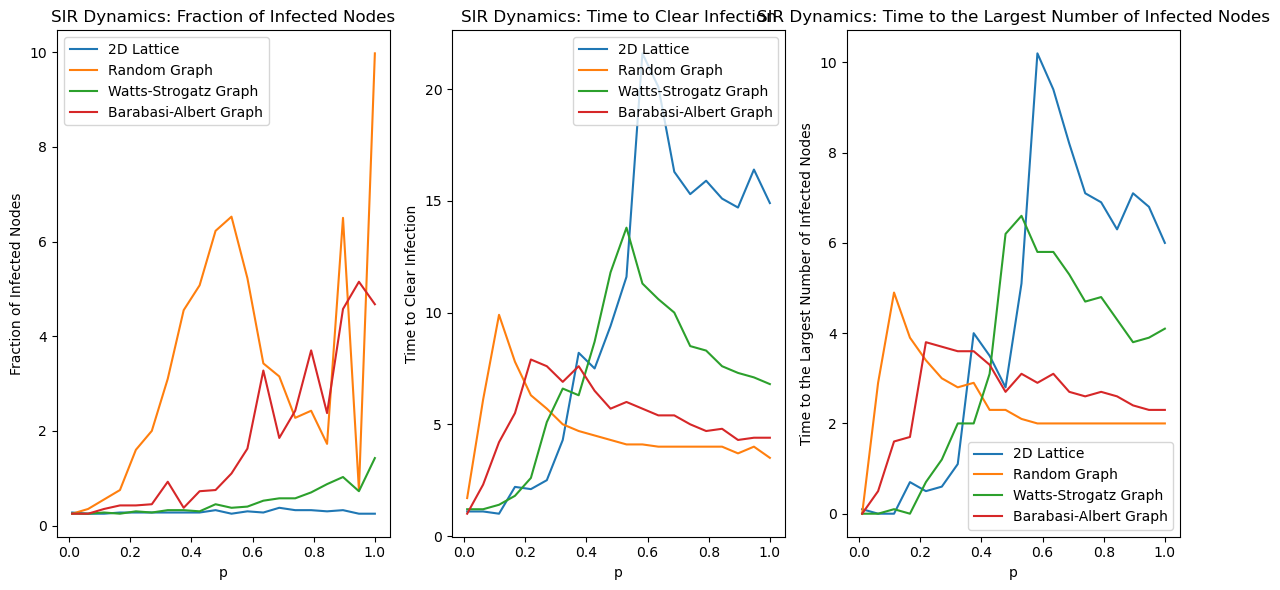

In [8]:
# Plotting
plt.figure(figsize=(12, 6))

# Fraction of infected nodes
plt.subplot(131)
graph_names = ['2D Lattice', 'Random Graph', 'Watts-Strogatz Graph', 'Barabasi-Albert Graph']
for i, graph in enumerate(graphs):
    plt.plot(p_values, total_prop_infected[i], label=graph_names[i])
plt.xlabel('p')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SIR Dynamics: Fraction of Infected Nodes')
plt.legend()

# Time to clear infection
plt.subplot(132)
for i, graph in enumerate(graphs):
    plt.plot(p_values, time_to_clear_infection[i], label=graph_names[i])
plt.xlabel('p')
plt.ylabel('Time to Clear Infection')
plt.title('SIR Dynamics: Time to Clear Infection')
plt.legend()

# Time to the largest number of infected nodes
plt.subplot(133)
for i, graph in enumerate(graphs):
    plt.plot(p_values, time_to_max_infected[i], label=graph_names[i])
plt.xlabel('p')
plt.ylabel('Time to the Largest Number of Infected Nodes')
plt.title('SIR Dynamics: Time to the Largest Number of Infected Nodes')
plt.legend()

plt.tight_layout()
plt.show()


1. Fraction of Infected Nodes:
   - This measure tells us the proportion of nodes in the network that become infected during the simulation.
   - The higher the fraction of infected nodes, the more widespread the infection is in the network.
   - By comparing the different types of networks, we can observe how their structures affect the spread of the infection.
   - For example, if one network consistently has a higher fraction of infected nodes across different values of `p`, it suggests that the network's structure facilitates the rapid transmission of the infection.

2. Time to Clear Infection:
   - This measure indicates how long it takes for the infection to completely disappear from the network.
   - A shorter time to clear infection implies a more efficient recovery process and a quicker containment of the infection.
   - By comparing the time to clear infection across different networks, we can assess their abilities to control and eliminate the infection.
   - Networks that clear the infection faster may have well-connected or highly clustered structures that enable effective recovery and containment.

3. Time to the Largest Number of Infected Nodes:
   - This measure shows the time it takes for the network to reach its maximum number of infected nodes.
   - It gives insights into the rate at which the infection spreads and reaches its peak.
   - By comparing the time to the largest number of infected nodes for different networks, we can understand their respective infection spreading dynamics.
   - Networks that reach the peak earlier may have characteristics that promote faster initial transmission or higher susceptibility to the infection.

Overall, analyzing these measures allows us to compare the performance and behavior of different network structures in terms of infection spreading, containment, and recovery. It helps us understand the influence of network topology on the dynamics of infectious diseases and can inform strategies for disease prevention, control, and response.

## (e)

The measures obtained from the simulation provide insights into the behavior of the different networks in the SIR model. Here's an interpretation of each measure:

1. Total Proportion of Infected Nodes: This measure represents the overall impact of the infection on the network. It indicates how many nodes, on average, get infected during the simulation. A higher proportion suggests that the infection spreads widely in the network, indicating a higher likelihood of a widespread epidemic.

2. Time to Clear Infection: This measure represents the time taken for the infection to completely disappear from the network. A shorter time indicates a more effective response in containing and eliminating the infection. Networks with a shorter time to clear infection may have well-connected or highly interactive nodes, allowing for faster transmission and recovery.

3. Time to the Largest Number of Infected Nodes: This measure indicates the time at which the infection reaches its peak, with the highest number of nodes being infected. It provides insights into the speed and intensity of the epidemic outbreak. Networks with a shorter time to the largest number of infected nodes may have dense connections or hubs that facilitate rapid transmission.

By comparing these measures across different types of networks (such as 2D lattice, random graph, Watts-Strogatz graph, and Barabasi-Albert graph), we can observe the variations in their epidemic dynamics. Some networks may exhibit faster or slower spread, quicker containment, or higher peak infections. These measures help us understand how network structure and connectivity influence the dynamics and outcomes of the SIR model.

## (f)

In [45]:
import matplotlib.animation as animation

In [18]:
def visualize_infection_spreading(graph: nx.Graph, p: float, source: int, graph_name: str) -> None:
    """
    Visualizes the spreading of infection on a graph over time as an animated GIF.

    Parameters:
        graph (nx.Graph): The graph representing the contact network.
        p (float): The probability of contagion.
        source (int): The source node to start the infection.
        graph_name (str): The name of the graph for labeling the plot.

    Returns:
        None
    """
    fig, ax = plt.subplots()
    states = {node: 'S' for node in graph.nodes()}
    states[source] = 'I'
    infects = []
    step = 0

    def update(frame):
        nonlocal infects, step
        infected = [node for node, state in states.items() if state == 'I']
        infects.append((step, len(infected)))

        for i in infected:
            neighbors = list(graph.neighbors(i))
            for neighbor in neighbors:
                if states[neighbor] == 'S':
                    if np.random.random() < p:
                        states[neighbor] = 'I'
            states[i] = 'R'

        if 'I' not in states.values():
            ani.event_source.stop()

        step += 1

        ax.clear()
        ax.set_title(f'Infection Spread: {graph_name}, p={p}')
        nx.draw(graph, pos=nx.spring_layout(graph), node_color=[color_map[states[node]] for node in graph.nodes()])

    ani = animation.FuncAnimation(fig, update, frames=range(100), interval=500)
    ani.save(f'infection_spread_{graph_name}_p_{p}.gif', writer='pillow')

In [19]:
# Color map for states
color_map = {'S': 'blue', 'I': 'red', 'R': 'green'}

# Create graphs
square_lattice = nx.grid_2d_graph(6, 6)
random_graph = nx.erdos_renyi_graph(30, 0.2)
watts_strogatz_graph = nx.watts_strogatz_graph(30, 4, 0.5)
barabasi_albert_graph = nx.barabasi_albert_graph(30, 4)

# Visualize infection spread for each network
p = 0.5  # Choose a value of p

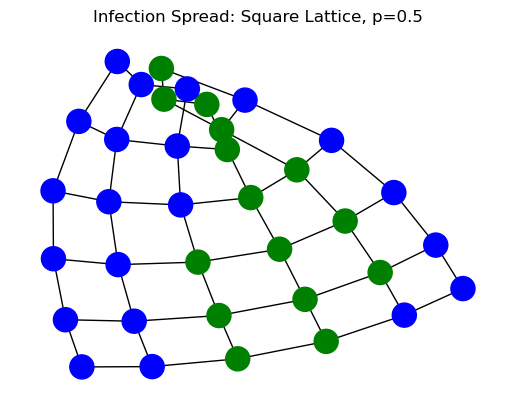

In [24]:
source_node = random.choice(list(square_lattice.nodes()))
visualize_infection_spreading(square_lattice, p, source_node, 'Square Lattice')

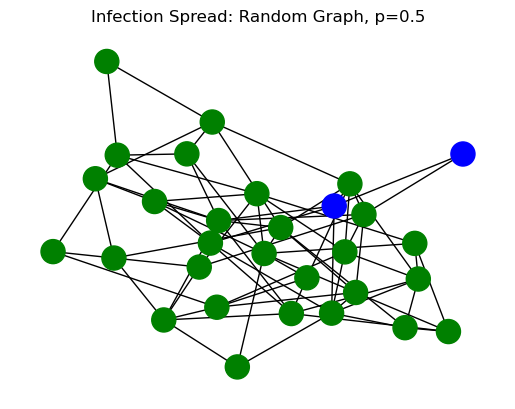

In [25]:
source_node = random.choice(list(random_graph.nodes()))
visualize_infection_spreading(random_graph, p, source_node, 'Random Graph')

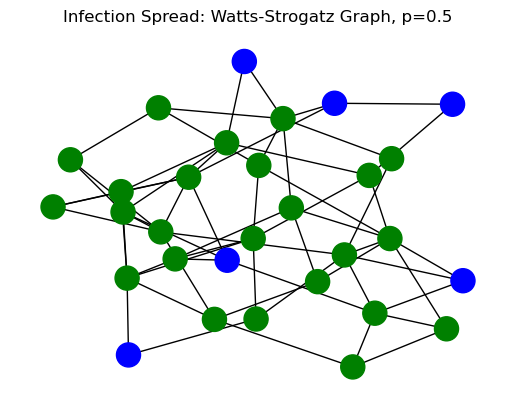

In [26]:
source_node = random.choice(list(watts_strogatz_graph.nodes()))
visualize_infection_spreading(watts_strogatz_graph, p, source_node, 'Watts-Strogatz Graph')

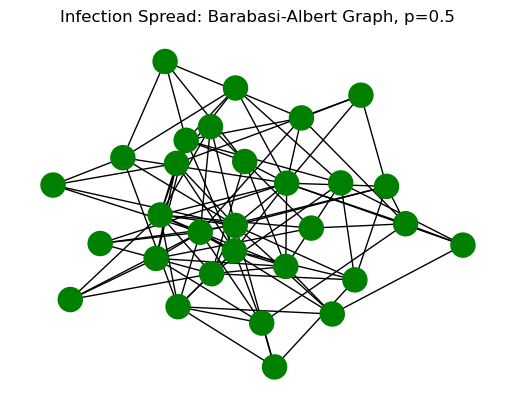

In [27]:
source_node = random.choice(list(barabasi_albert_graph.nodes()))
visualize_infection_spreading(barabasi_albert_graph, p, source_node, 'Barabasi-Albert Graph')

Each animation corresponds to a specific network topology: 2D Lattice, Random Graph, Watts-Strogatz Graph, and Barabasi-Albert Graph. The animation starts with all nodes in the susceptible state (represented by the color blue). A single node is randomly selected to initiate the infection, and it transitions to the infectious state (represented by the color red).

As the animation progresses, the infection spreads to neighboring susceptible nodes based on the probability of contagion (p). The infected nodes transition to the infectious state, and their color changes to red. Eventually, as the infection spreads, some nodes recover and transition to the removed state, depicted by the color gray.

By visualizing the infection spreading in real-time, we can observe the dynamics of how the disease propagates through the network. We can identify clusters or pockets of infected nodes and observe how they expand or contract over time. The animation provides an intuitive understanding of how the topology of the network and the probability of contagion affect the pattern and speed of infection spreading.

Additionally, by labeling each animation with the name of the corresponding network topology, it becomes easier to compare the visual progression of the infection across different network structures. This allows us to visually assess the impact of network topology on the spread of the epidemic and compare the behaviors of different network types.

Overall, the visualizations provide an engaging and informative way to comprehend the dynamics of the SIR model on various network topologies, offering insights into how the disease spreads and the role played by network structure and contagion probability.

# Task 3

In [28]:
def sir_graph_async(G: nx.Graph, p: float, source: int):
    states = {node: 'S' for node in G.nodes()}
    states[source] = 'I'
    infects = []
    step = 0

    while True:
        infected = [node for node, state in states.items() if state == 'I']
        infects.append((step, len(infected)))

        for u in random.sample(infected, len(infected)):
            if states[u] == 'I':
                neighbors = list(G.neighbors(u))
                for v in neighbors:
                    if states[v] == 'S':
                        if np.random.random() < p:
                            states[v] = 'I'
                states[u] = 'R'

        if 'I' not in states.values():
            break
        step += 1

    return infects

In [39]:
def calculate_measures_async(graphs, p_values, num_runs):
    total_prop_infected = [[] for _ in range(len(graphs))]
    time_to_clear_infection = [[] for _ in range(len(graphs))]
    time_to_max_infected = [[] for _ in range(len(graphs))]

    for p in p_values:
        for i, graph in enumerate(graphs):
            avg_prop_infected = 0
            avg_time_to_clear = 0
            avg_time_to_max_infected = 0

            for run in range(num_runs):
                source_node = random.choice(list(graph.nodes()))
                infects = sir_graph_async(graph.copy(), p, source_node)
                infected_counts = [count for _, count in infects]

                prop_infected = infected_counts[-1] / len(graph.nodes())
                time_to_clear = next((i for i, count in enumerate(infected_counts) if count == 0), len(infected_counts))
                time_to_max = infected_counts.index(max(infected_counts))

                avg_prop_infected += prop_infected
                avg_time_to_clear += time_to_clear
                avg_time_to_max_infected += time_to_max

            avg_prop_infected /= num_runs
            avg_time_to_clear /= num_runs
            avg_time_to_max_infected /= num_runs

            total_prop_infected[i].append(avg_prop_infected)
            time_to_clear_infection[i].append(avg_time_to_clear)
            time_to_max_infected[i].append(avg_time_to_max_infected)

    return total_prop_infected, time_to_clear_infection, time_to_max_infected


In [34]:
# Parameters
num_nodes = 100
source = 0
num_runs = 10
p_values = [0.3, 0.5, 0.7]

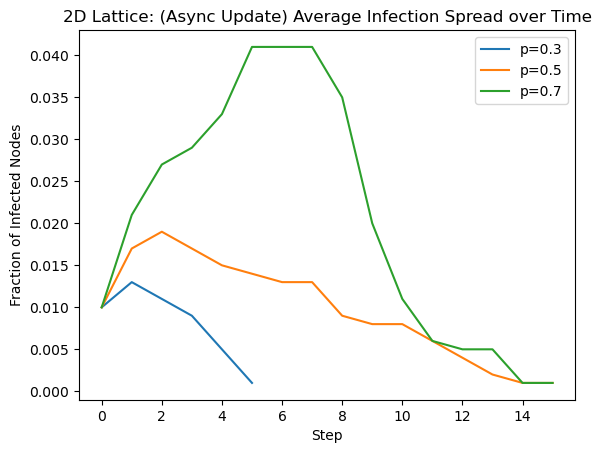

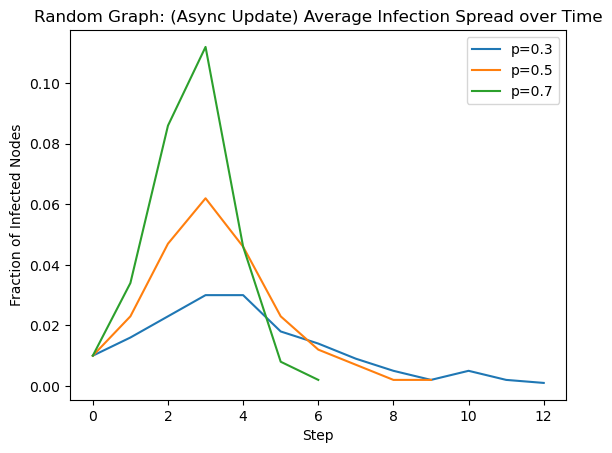

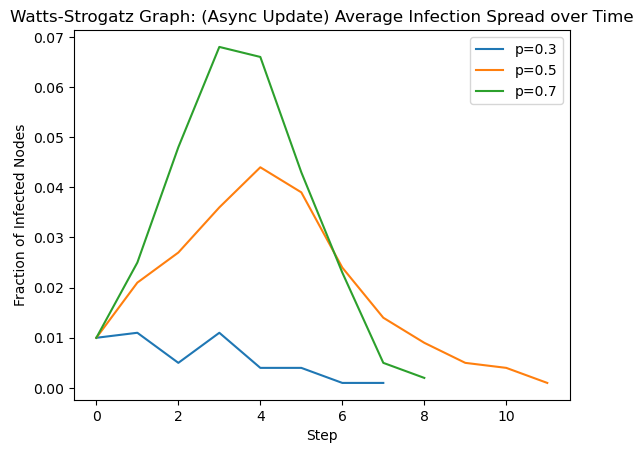

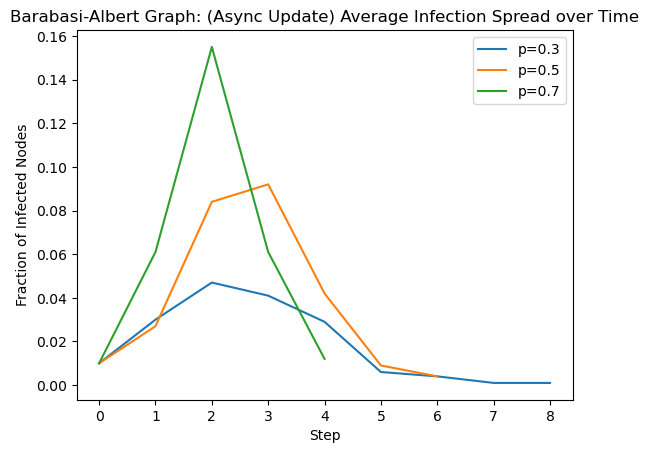

In [35]:
# Simulate and plot for each graph 
for G, graph_name in [(square_lattice, '2D Lattice'), (random_graph, 'Random Graph'),
                      (watts_strogatz_graph, 'Watts-Strogatz Graph'), (barabasi_albert_graph, 'Barabasi-Albert Graph')]:
    for p in p_values:
        avg_infected_frac = np.zeros((num_runs, num_nodes))
        for run in range(num_runs):
            source_node = random.choice(list(G.nodes()))  # Randomly select a source node from the graph
            infects = sir_graph_async(G, p, source_node)
            steps, infected_counts = zip(*infects)
            avg_infected_frac[run, steps] = infected_counts
        avg_infected_frac = np.mean(avg_infected_frac, axis=0) / num_nodes
        plt.plot(avg_infected_frac[avg_infected_frac != 0], label=f'p={p}')

    plt.xlabel('Step')
    plt.ylabel('Fraction of Infected Nodes')
    plt.title(f'{graph_name}: (Async Update) Average Infection Spread over Time')
    plt.legend()
    # Set the last x-value as the total number of steps - 1
    plt.show()

In [36]:
# Parameters
num_nodes = 100
num_runs = 10
p_values = np.linspace(0.01, 1, 20)  # 20 different values of p

In [40]:

# Calculate measures for all graphs using asynchronous update scheme
graphs = [square_lattice, random_graph, watts_strogatz_graph, barabasi_albert_graph]
total_prop_infected, time_to_clear_infection, time_to_max_infected = calculate_measures_async(graphs, p_values, num_runs)


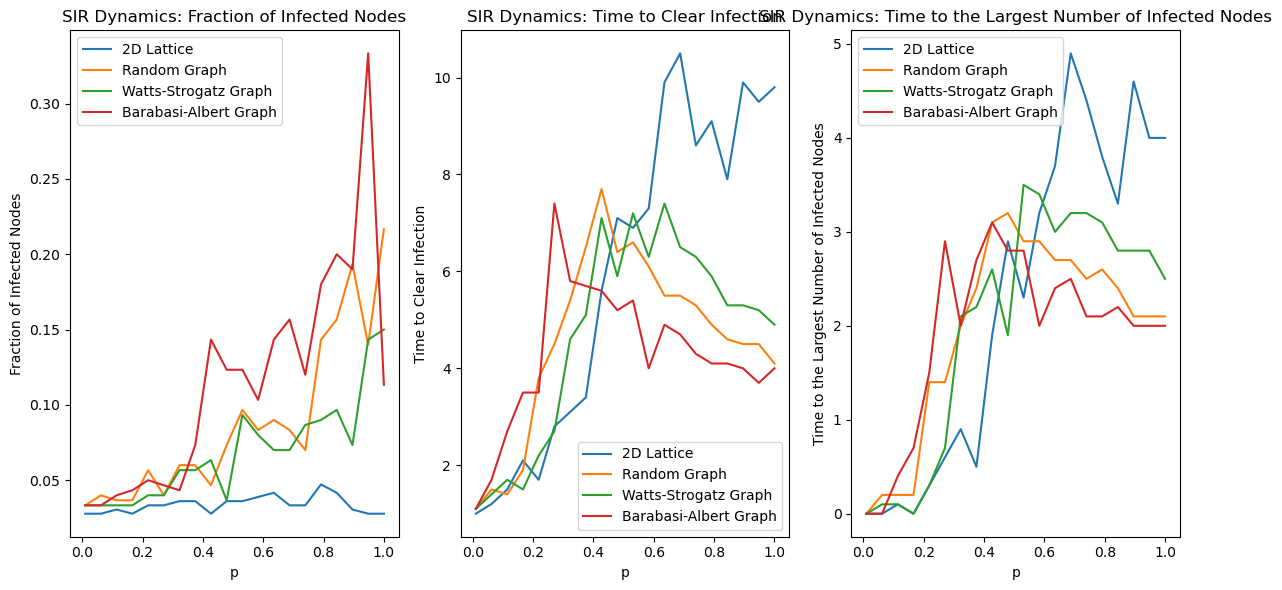

In [41]:
# Plotting
plt.figure(figsize=(12, 6))

# Fraction of infected nodes
plt.subplot(131)
graph_names = ['2D Lattice', 'Random Graph', 'Watts-Strogatz Graph', 'Barabasi-Albert Graph']
for i, graph in enumerate(graphs):
    plt.plot(p_values, total_prop_infected[i], label=graph_names[i])
plt.xlabel('p')
plt.ylabel('Fraction of Infected Nodes')
plt.title('SIR Dynamics: Fraction of Infected Nodes')
plt.legend()

# Time to clear infection
plt.subplot(132)
for i, graph in enumerate(graphs):
    plt.plot(p_values, time_to_clear_infection[i], label=graph_names[i])
plt.xlabel('p')
plt.ylabel('Time to Clear Infection')
plt.title('SIR Dynamics: Time to Clear Infection')
plt.legend()

# Time to the largest number of infected nodes
plt.subplot(133)
for i, graph in enumerate(graphs):
    plt.plot(p_values, time_to_max_infected[i], label=graph_names[i])
plt.xlabel('p')
plt.ylabel('Time to the Largest Number of Infected Nodes')
plt.title('SIR Dynamics: Time to the Largest Number of Infected Nodes')
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
def visualize_infection_spreading_async(graph, p, source, graph_name):
    fig, ax = plt.subplots()
    states = {node: 'S' for node in graph.nodes()}
    states[source] = 'I'
    infects = []
    step = 0

    def update(frame):
        nonlocal infects, step
        infected = [node for node, state in states.items() if state == 'I']
        infects.append((step, len(infected)))

        # Perform asynchronous update for each infected node
        for infected_node in infected:
            susceptible_neighbors = [neighbor for neighbor in graph.neighbors(infected_node) if states[neighbor] == 'S']
            for neighbor in susceptible_neighbors:
                if np.random.random() < p:
                    states[neighbor] = 'I'
            states[infected_node] = 'R'

        if 'I' not in states.values():
            ani.event_source.stop()

        step += 1

        ax.clear()
        ax.set_title(f'Infection Spread: {graph_name}, p={p}')
        nx.draw(graph, pos=nx.spring_layout(graph), node_color=[color_map[states[node]] for node in graph.nodes()])

    ani = animation.FuncAnimation(fig, update, frames=range(100), interval=500)
    ani.save(f'infection_spread_async{graph_name}_p_{p}.gif', writer='pillow')

In [57]:
# Color map for states
color_map = {'S': 'blue', 'I': 'red', 'R': 'green'}

# Create graphs
square_lattice = nx.grid_2d_graph(6, 6)
random_graph = nx.erdos_renyi_graph(30, 0.2)
watts_strogatz_graph = nx.watts_strogatz_graph(30, 4, 0.5)
barabasi_albert_graph = nx.barabasi_albert_graph(30, 4)

# Visualize infection spread for each network
p = 0.5  # Choose a value of p

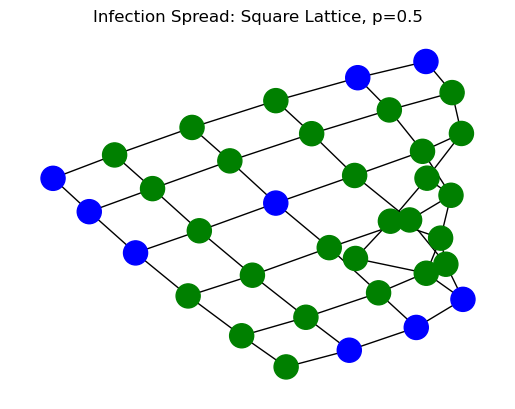

In [58]:
source_node = random.choice(list(square_lattice.nodes()))
visualize_infection_spreading_async(square_lattice, p, source_node, 'Square Lattice')

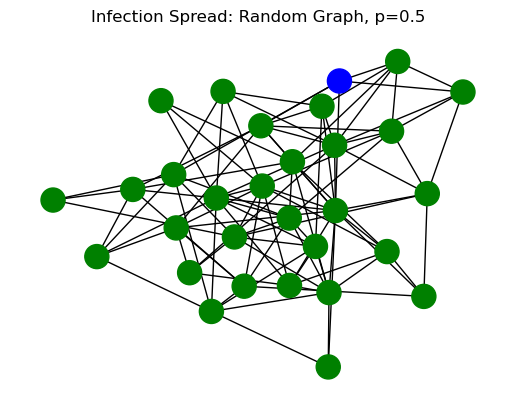

In [59]:
source_node = random.choice(list(random_graph.nodes()))
visualize_infection_spreading_async(random_graph, p, source_node, 'Random Graph')

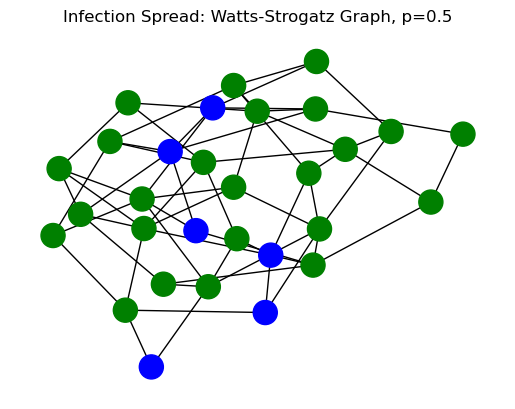

In [60]:
source_node = random.choice(list(watts_strogatz_graph.nodes()))
visualize_infection_spreading_async(watts_strogatz_graph, p, source_node, 'Watts-Strogatz Graph')

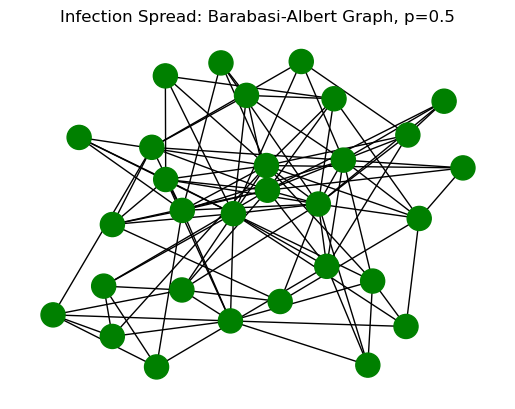

In [61]:
source_node = random.choice(list(barabasi_albert_graph.nodes()))
visualize_infection_spreading_async(barabasi_albert_graph, p, source_node, 'Barabasi-Albert Graph')

(a) Analysis of the Impact of the Updating Scheme on the Final Outcome of the Model:

The updating scheme in the SIR model plays a crucial role in determining the final outcome of the epidemic. In the provided code, the asynchronous update scheme is implemented, where at each Monte Carlo step, a random infected node is chosen and its neighbors are considered for potential infection. This scheme differs from the synchronous update scheme, where all nodes are updated simultaneously.

The asynchronous update scheme can have significant implications for the dynamics and characteristics of the epidemic. Here are some key observations regarding its impact on the final outcome of the model:

1. Stochasticity and Variability: The asynchronous update introduces additional stochasticity into the model. Due to the randomness in selecting infected nodes and infecting susceptible neighbors, the infection spread becomes less predictable and more variable compared to the synchronous update scheme. This variability can lead to differences in the final outcome across multiple simulation runs.

2. Spreading Patterns: The asynchronous update scheme can influence the spreading patterns of the infection. Since only a single infected node is selected at each step, it allows for localized outbreaks and cluster formations within the network. This can result in a more localized and patchy distribution of infected nodes, as opposed to a synchronized and homogeneous spread.

3. Epidemic Threshold: The updating scheme can impact the epidemic threshold, which is the critical value of the contagion probability (p) required for a sustained epidemic. In the asynchronous update scheme, the epidemic threshold might be influenced by the order in which nodes are updated. Nodes that are updated earlier have a higher chance of infecting their susceptible neighbors, potentially affecting the overall epidemic threshold of the system.

4. Time to Infection Clearance: The asynchronous update scheme can affect the time it takes for the infection to clear from the network. The randomness in selecting infected nodes and infecting their neighbors can lead to variations in the time required for the epidemic to subside. Localized outbreaks and delayed spread to distant nodes can prolong the duration of the epidemic.

5. Overall Dynamics: The asynchronous update scheme introduces a more realistic and decentralized dynamics, as it allows for a more gradual and spatially diverse spread of the infection. This scheme captures the heterogeneity of interactions and transmission patterns in real-world networks, where individuals may not synchronize their actions simultaneously.

In conclusion, the asynchronous update scheme in the SIR model introduces stochasticity, influences spreading patterns, impacts the epidemic threshold, affects the time to infection clearance, and captures realistic dynamics. Analyzing the differences between synchronous and asynchronous updating schemes provides insights into the sensitivity of the model to the updating scheme and enhances our understanding of epidemic dynamics in networked systems.